In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime

matplotlib.rcParams['font.serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.size'] = '15.0'
matplotlib.rcParams['text.usetex'] = 'True'

In [53]:
# read in the phytoplankton abundance data 
infile = '../data/taxa_abundance_v0.1.csv'
data = pd.read_csv(infile, sep = ',',parse_dates = ['date'])

# datetime_index = pd.DatetimeIndex(data.date)
# data = data.set_index(datetime_index)

# get the list of columns in the table, which will include all of the species
# for t in data.columns: print(t)

datetime_index = pd.DatetimeIndex(data.date.values)
data = data.set_index(datetime_index)

# before we can plot the data, we need to calculate abundances and then get the daily mean and standard deviation of 
# those abundances
data = data.iloc[:,0:-3].multiply(data['vol_ml'], axis="index")



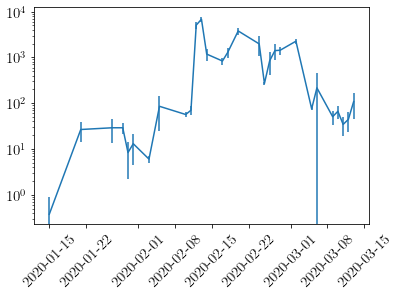

In [55]:
# so now we want to group the data by day and calculate the daily mean and standard deviation

dmean = abun.resample('D').mean().dropna()
dstd = abun.resample('D').std().dropna()

# now pick a species, s,  that you want to plot the abundance for
s = 'Heterocapsa triquetra<Heterocapsa'

# using the errorbar function, you can plot the standard deviation and the mean together
# 
plt.errorbar(dmean.index, dmean[s], yerr=dstd[s])
plt.xticks(rotation = 45)
plt.yscale('log')
plt.show()